# Sankey Plot

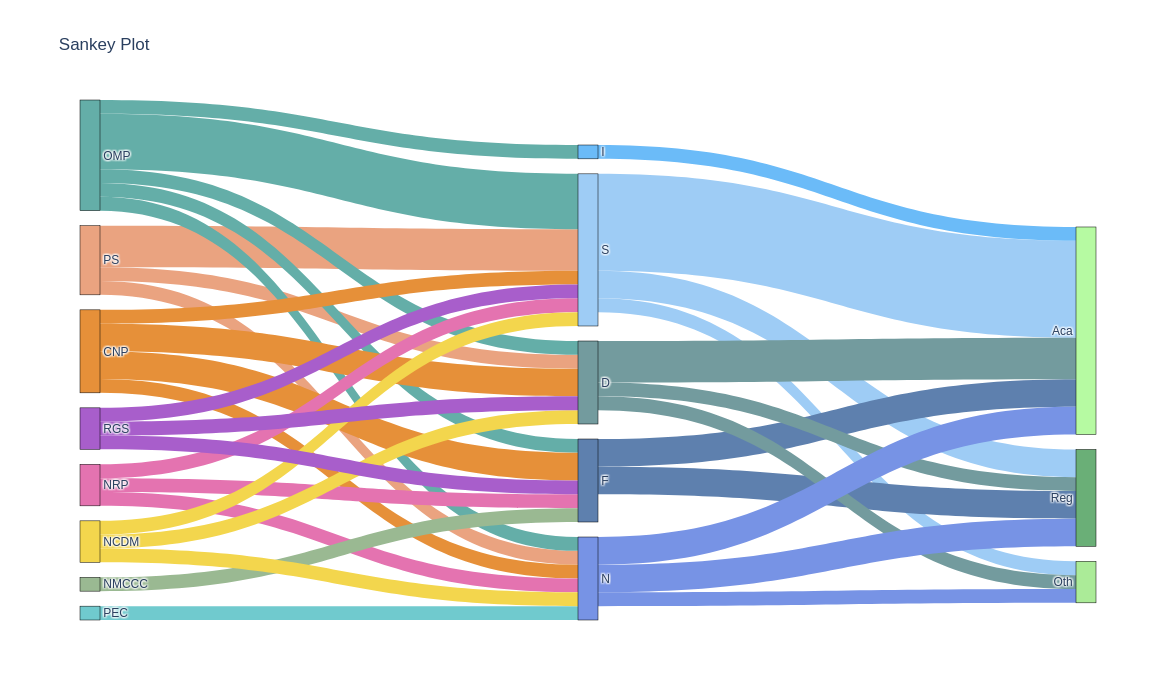

In [14]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/sankey_assignment.csv')  # Read CSV into a DataFrame

df.set_index('LABEL', inplace=True)

sourceArr = []
targetArr = []
valueArr = []

colNodes = df.columns.to_numpy()  # Initially all nodes in the graph, they are the columns in the dataset

endNodes = np.array(['Reg', 'Aca', 'Oth'])
intermediateNodes = df.index.to_numpy()    # Row names (Nodes)
startNodes = [node for node in colNodes if node not in set(endNodes) and node not in set(intermediateNodes)]
# print(endNodes)
# print(intermediateNodes)
# print(startNodes)

allNodes = np.concatenate((intermediateNodes, colNodes))

# a dictionary for fast lookup
node_to_index = {node: idx for idx, node in enumerate(allNodes)}
link_colors = []


for startNode in startNodes:
    for intermediateNode in intermediateNodes:
        if df.at[intermediateNode, startNode] != 0:  # If there is an edge
            # append to other arrays the index of row and col
            sourceArr.append(node_to_index[startNode])
            targetArr.append(node_to_index[intermediateNode])
            valueArr.append(df.at[intermediateNode, startNode])

for intermediateNode in intermediateNodes:
    for endNode in endNodes:
        if df.at[intermediateNode, endNode] != 0:  # If there is an edge
            # append to other arrays the index of row and col
            sourceArr.append(node_to_index[intermediateNode])
            targetArr.append(node_to_index[endNode])
            valueArr.append(df.at[intermediateNode, endNode])

node_colors = ['#9eccf5', '#5e80ae', '#739b9e', '#7793e5','#6bbbf8', '#eaa380', '#64aea8', 
               '#e69039', '#e473b0', '#9ab992', '#70cace','#f3d64d', '#a85ecb', '#6aaf77', '#b6faa2', '#abeb98']


fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = allNodes,
        color = [node_colors[node_to_index[node]] for node in allNodes]
    ),
    link = dict(
        source = sourceArr, # indices correspond to labels, eg A1, A2, A1, B1, ...
        target = targetArr,
        value = valueArr,
        color = [node_colors[sourceNode] for sourceNode in sourceArr]
    ))])


fig.update_layout(title_text="Sankey Plot", font_size=12, height=700, width=1000)
fig.show()
